# IRIS PROJECT

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 1: Read The DataSet

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Step 2: Perform Basic Data Quality Checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

Step 3: Seprate X and Y

In [6]:
x = df.drop(columns=['species'])
y = df[['species']]

In [7]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


Step 4: Process The Data

In [9]:
x.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler()).set_output(transform='pandas')

In [12]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [13]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

Save into pickel fromat so we can use any time this process directicaly

In [14]:
import pickle
with open('pipeline.pkl', 'wb') as file1:
    pickle.dump(num_pipe, file1)

Step 3: Applay Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pre, y, test_size=0.33, random_state=40)

In [16]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
100,0.553333,0.558611,1.274295,1.712096
54,0.795669,-0.592373,0.478571,0.395774
67,-0.052506,-0.822570,0.194384,-0.262387
97,0.432165,-0.362176,0.308059,0.132510
24,-1.264185,0.788808,-1.056039,-1.315444


In [17]:
y_train.head()

,species
100,virginica
54,versicolor
67,versicolor
97,versicolor
24,setosa


In [18]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
38,-1.748856,-0.131979,-1.397064,-1.315444
66,-0.294842,-0.131979,0.421734,0.395774
115,0.674501,0.328414,0.876433,1.448832
117,2.249683,1.709595,1.672157,1.317199
89,-0.416010,-1.282963,0.137547,0.132510


In [19]:
y_test.head()

,species
38,setosa
66,versicolor
115,virginica
117,virginica
89,versicolor


In [20]:
x_train.shape

(100, 4)

In [21]:
x_test.shape

(50, 4)

Step 6: Model Building

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

step 7: Model Evaluation

In [23]:
model.score(x_train, y_train)

0.97

In [24]:
model.score(x_test, y_test)

1.0

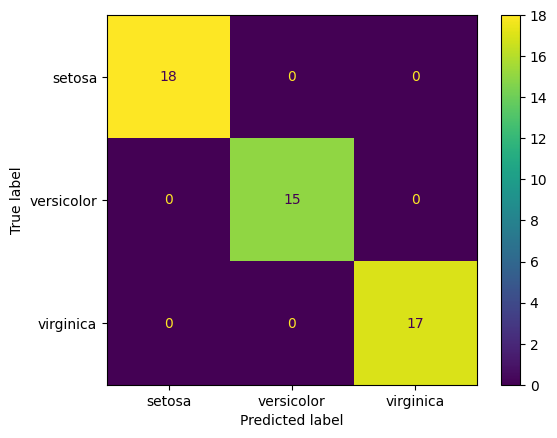

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

In [26]:
ypred_test = model.predict(x_test)

In [27]:
ypred_test[0:5]

array(['setosa', 'versicolor', 'virginica', 'virginica', 'versicolor'],
      dtype=object)

In [28]:
y_test.head()

,species
38,setosa
66,versicolor
115,virginica
117,virginica
89,versicolor


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='f1_macro')
scores

array([0.95213675, 0.90277778, 0.95213675, 0.89166667, 0.94871795])

In [31]:
scores.mean()

np.float64(0.9294871794871795)

Save Model object

In [32]:
with open('model.pkl', 'wb') as file2:
    pickle.dump(model, file2)

Loading The Pickle file for Future use

In [33]:
with open('pipeline.pkl', 'rb') as file3:
    p = pickle.load(file3)
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [34]:
with open('model.pkl', 'rb') as file4:
    m = pickle.load(file4)
m

LogisticRegression()